<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
%matplotlib inline


In [74]:
# Load MNIST dataset
(X_train_all, y_train_all), (X_test, y_test) = keras.datasets.mnist.load_data()

total_samples = len(X_train_all)

train_samples = int(0.8 * total_samples)
test_samples = int(0.1 * total_samples)
val_samples = total_samples - train_samples - test_samples

# Split the data
X_train = X_train_all[:train_samples]
y_train = y_train_all[:train_samples]

X_val = X_train_all[train_samples:train_samples + val_samples]
y_val = y_train_all[train_samples:train_samples + val_samples]

X_test = X_train_all[train_samples + val_samples:]
y_test = y_train_all[train_samples + val_samples:]


In [75]:
len(X_train)

48000

In [76]:
len(X_test)

6000

In [77]:
len(X_val)

6000

In [78]:
X_train[0].shape

(28, 28)

In [79]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

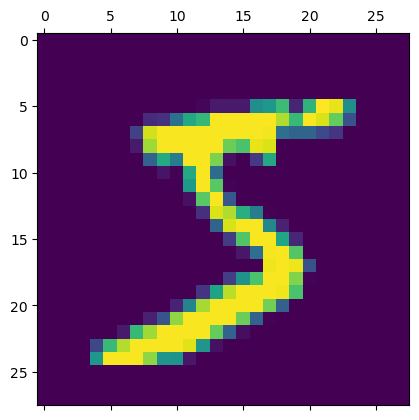

In [80]:
plt.matshow(X_train[0])

In [81]:
y_train[0]

5


Normalizing pixel values is a common preprocessing step in machine learning, especially for tasks involving image data. In the context of image processing, pixel values usually range from 0 to 255, where 0 represents black and 255 represents white. Normalizing the pixel values to a scale between 0 and 1 has several advantages:


In [82]:
X_train = X_train / 255
X_test = X_test / 255

In [83]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [84]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [85]:
X_train_flattened.shape

(48000, 784)

In [86]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

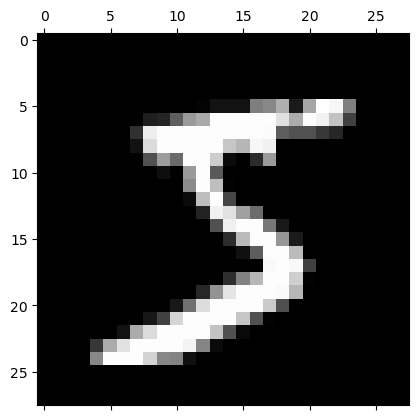

In [87]:
plt.matshow(X_train[0],cmap='gray')

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [88]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4971 - accuracy: 0.8696
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3272 - accuracy: 0.9080
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3053 - accuracy: 0.9145
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.9173
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2876 - accuracy: 0.9202
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.9211
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2782 - accuracy: 0.9224
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2755 - accuracy: 0.9241
Epoch 9/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9246
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.270

In [89]:
model.evaluate(X_test_flattened, y_test)

188/188 [==============================] - 1s 2ms/step - loss: 0.2283 - accuracy: 0.9377


[0.22831091284751892, 0.937666654586792]

In [90]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

188/188 [==============================] - 1s 2ms/step


array([8.0088831e-11, 1.4601457e-15, 2.6042072e-08, 4.7934069e-08,
       7.1287869e-09, 5.0518538e-06, 4.4935380e-10, 1.7054220e-13,
       6.7563894e-07, 9.4219377e-10], dtype=float32)

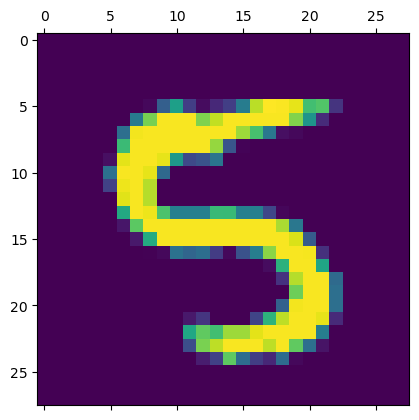

In [91]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [92]:
np.argmax(y_predicted[0])

5

In [93]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [94]:
y_predicted_labels[:5]

[5, 3, 0, 0, 0]

In [95]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[568,   0,   2,   1,   2,   5,   2,   4,   3,   0],
       [  0, 616,   2,   1,   0,   2,   0,   1,   8,   0],
       [  4,   2, 558,   6,   4,   4,   3,   5,  14,   0],
       [  3,   1,  10, 569,   1,  21,   1,   1,  16,   4],
       [  1,   9,   2,   0, 568,   0,   3,   2,   2,   8],
       [  8,   1,   9,  17,   4, 486,  10,   1,   9,   4],
       [  2,   2,   6,   0,   3,   3, 552,   0,   3,   0],
       [  3,   2,   3,   3,   5,   0,   0, 644,   1,   7],
       [  2,  16,   5,   8,   1,  15,   0,   7, 532,  11],
       [  1,   3,   2,   7,   8,   4,   0,  12,   6, 533]])>

Text(95.72222222222221, 0.5, 'Truth')

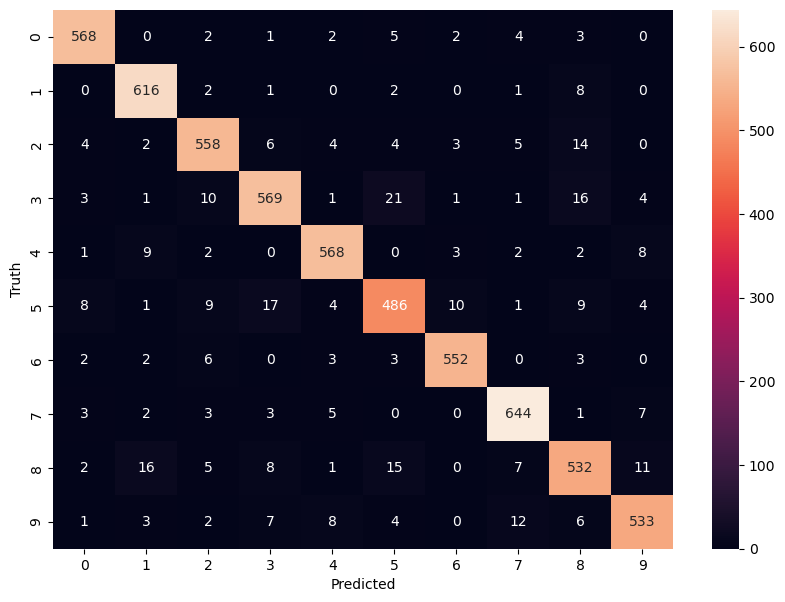

In [96]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [97]:
model = keras.Sequential([
   keras.layers.Dense(100, input_shape=(784,), activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(50,activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(25,activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(10, activation='softmax')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2849 - accuracy: 0.9134
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1214 - accuracy: 0.9635
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0870 - accuracy: 0.9743
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0677 - accuracy: 0.9791
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0549 - accuracy: 0.9833
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0435 - accuracy: 0.9865
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0286 - accuracy: 0.9912
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.018

In [98]:
model.evaluate(X_test_flattened,y_test)

188/188 [==============================] - 1s 3ms/step - loss: 0.0924 - accuracy: 0.9793


[0.09243598580360413, 0.9793333411216736]

188/188 [==============================] - 1s 3ms/step
tf.Tensor(
[[574   0   8   0   0   0   1   0   2   2]
 [  0 621   1   1   0   0   0   1   6   0]
 [  1   1 596   1   0   0   0   0   0   1]
 [  1   0   5 613   0   2   0   0   5   1]
 [  0   5   1   0 582   0   0   1   1   5]
 [  1   0   1   7   0 521   9   0   5   5]
 [  0   0   0   0   0   0 569   0   2   0]
 [  1   2   3   3   2   0   0 650   1   6]
 [  1   0   3   1   2   1   1   0 587   1]
 [  0   1   0   1   8   2   0   0   1 563]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

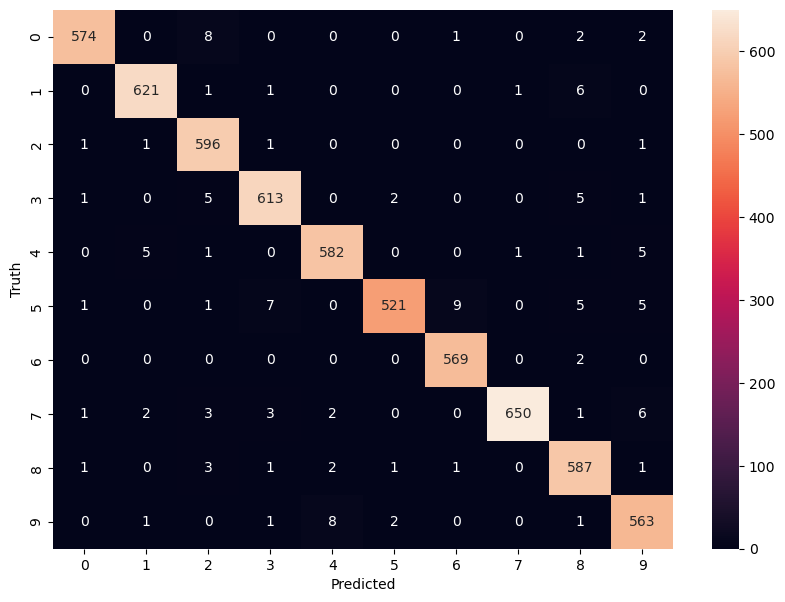

In [99]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [100]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(50, activation=keras.layers.PReLU(alpha_initializer='zeros')),
    keras.layers.Dense(10, activation='sigmoid')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)
model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2884 - accuracy: 0.9143
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1247 - accuracy: 0.9629
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0869 - accuracy: 0.9739
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0654 - accuracy: 0.9799
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0517 - accuracy: 0.9847
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0414 - accuracy: 0.9875
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0333 - accuracy: 0.9901
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0268 - accuracy: 0.9917
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.017

In [101]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.9810


[0.09083682298660278, 0.9810000061988831]

188/188 [==============================] - 1s 3ms/step
tf.Tensor(
[[576   0   2   2   0   0   1   0   2   4]
 [  0 625   1   0   0   0   2   0   2   0]
 [  1   1 594   0   0   0   0   2   2   0]
 [  0   0   3 614   0   3   0   0   7   0]
 [  0   7   0   0 578   0   2   1   1   6]
 [  0   1   1   6   0 529   8   0   2   2]
 [  0   0   0   0   0   0 570   0   1   0]
 [  1   4   0   4   1   0   0 650   2   6]
 [  0   1   0   2   0   1   2   0 590   1]
 [  0   2   0   3   4   5   0   0   2 560]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

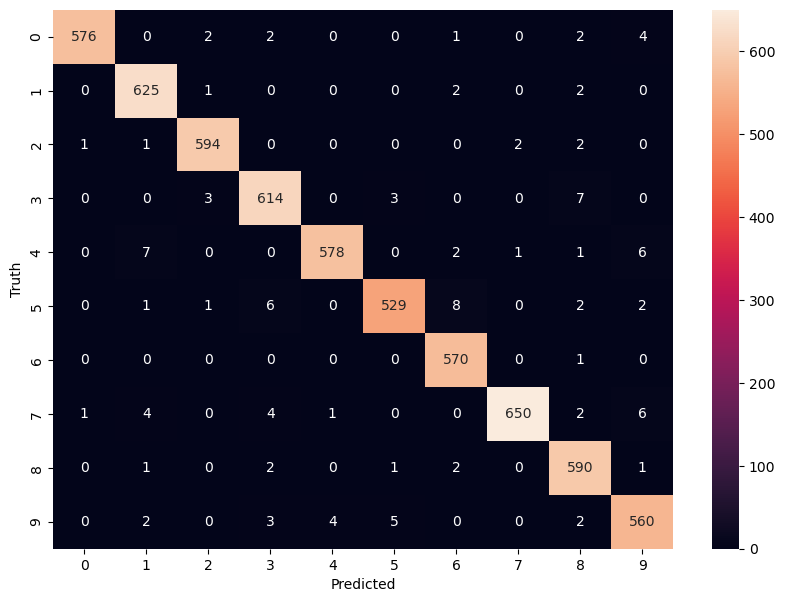

In [102]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 100)               78600     
                                                                 
 dense_50 (Dense)            (None, 50)                5100      
                                                                 
 dense_51 (Dense)            (None, 10)                510       
                                                                 
Total params: 84210 (328.95 KB)
Trainable params: 84210 (328.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Connvolutional layer Added as the first layer of the ANN
which improved accuracy 


In [104]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1), padding='same'),
    keras.layers.MaxPooling2D(pool_size=(3, 3)),
    
    
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

custom_adadelta_optimizer = keras.optimizers.Adadelta(learning_rate=1.0)

model.compile(optimizer=custom_adadelta_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1500/1500 [==============================] - 171s 113ms/step - loss: 0.2166 - accuracy: 0.9305
Epoch 2/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0535 - accuracy: 0.9836
Epoch 3/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0380 - accuracy: 0.9883
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 5/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0180 - accuracy: 0.9944
Epoch 7/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0152 - accuracy: 0.9953
Epoch 8/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 9/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0102 - accuracy: 0.9971
Epoch 10/10
1500/1500 [==============================] - 30s 2

In [108]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 2s 9ms/step - loss: 0.0433 - accuracy: 0.9903


[0.043267857283353806, 0.9903333187103271]

188/188 [==============================] - 2s 8ms/step
tf.Tensor(
[[580   0   2   0   0   1   2   0   1   1]
 [  0 628   0   0   0   0   2   0   0   0]
 [  0   0 598   1   0   0   0   0   1   0]
 [  0   0   0 626   0   1   0   0   0   0]
 [  0   5   0   0 584   0   1   3   0   2]
 [  0   0   0   3   0 541   4   0   1   0]
 [  0   0   0   0   0   0 571   0   0   0]
 [  0   2   0   0   1   0   0 665   0   0]
 [  0   0   1   1   0   1   0   0 594   0]
 [  0   0   0   8   6   3   0   0   4 555]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

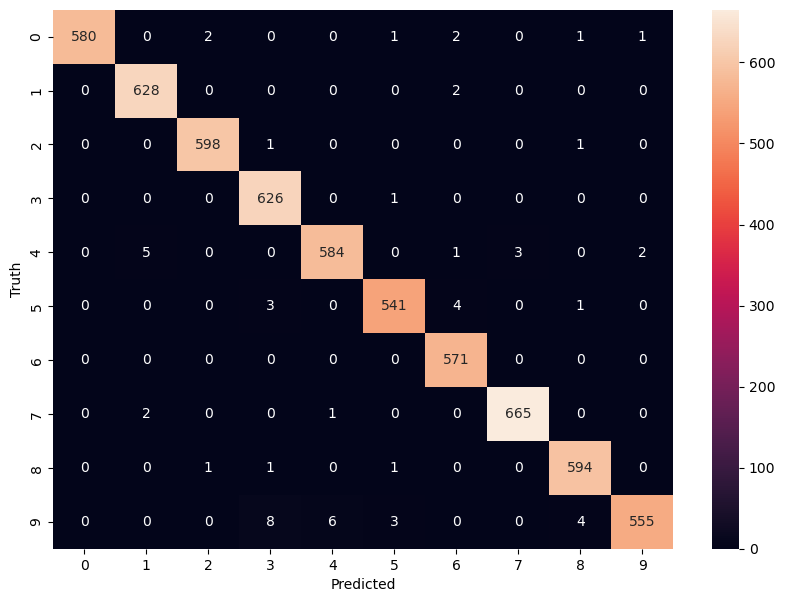

In [106]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [107]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        1088      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 9, 9, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 100)             